In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
kid_annot = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney_annot.csv') #creating an kid_annot data frame
kid_annot = kid_annot.rename(columns={'pData.eset..match.unique.sample_ID...sample_ID....': 'Sample ID', 'person' : 'Person ID',  'side' : 'Side'})
kid_annot = kid_annot.drop(columns=['Unnamed: 0']) #Column does not contain any useful info, so it was dropped
kid_annot.set_index('Sample ID', inplace=True) #modify the data frama into a better form

In [3]:
kidney_df = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney.csv')  #creating an kid_annot data frame
kidney_df = kidney_df.drop(columns=['Unnamed: 0']) #column does not contain any useful info, so it was dropped

In [ ]:
pvalues = []
for i in range(len(kidney_df)):
    row = (kidney_df.iloc[i].tolist())
    kid_annot["Transcript"] = row
    transcript_pos = kid_annot.loc[kid_annot.AKI == 1]["Transcript"]
    transcript_neg = kid_annot.loc[kid_annot.AKI == 0]["Transcript"]
    p = ttest_ind(transcript_pos, transcript_neg, equal_var=False).pvalue
    pvalues.append(p)
    
kidney_df["Pvalues"] = pvalues


In [6]:
sorted_kidney = kidney_df.sort_values(by=['Pvalues'], ascending=True) #sort he transcripts based on pvalues
transcript = sorted_kidney.iloc[0].tolist()
kid_annot['Transcript'] = transcript[:-1] #selecting the best transcript, the one with lowest p-value

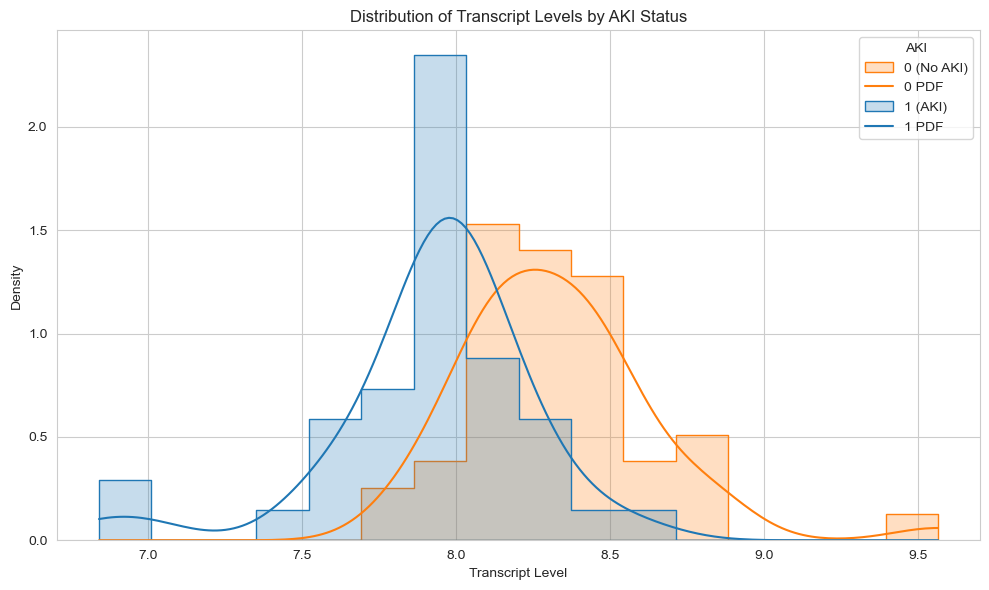

In [6]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the histogram plot with distributions for AKI=0 and AKI=1
plt.figure(figsize=(10, 6))
sns.histplot(data=kid_annot, x="Transcript", hue="AKI", element="step", stat="density", common_norm=False, kde=True)

plt.title('Distribution of Transcript Levels by AKI Status')
plt.xlabel('Transcript Level')
plt.ylabel('Density')
plt.legend(title='AKI', labels=['0 (No AKI)', '0 PDF', '1 (AKI)', '1 PDF'])

plt.tight_layout()
plt.show()

In [7]:
#Calculating the threshold
mean_positive = np.mean(kid_annot.loc[kid_annot.AKI == 1]["Transcript"])
mean_negative = np.mean(kid_annot.loc[kid_annot.AKI == 0]["Transcript"])
threshold = (mean_positive+mean_negative) / 2
threshold

8.12810216075645

In [8]:
#Creating classsifier based on the previous defined threshold
labels = []
for x in kid_annot['Transcript']:
    if x >= threshold:
        labels.append(1)
    else: labels.append(0)
kid_annot["Prediction"] = labels

In [13]:
preds = {}
preds['Model 1']=labels

{'Model 1': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0]}

In [14]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(kid_annot['AKI'], kid_annot['Prediction']).ravel()
tn, fp, fn, tp

(32, 8, 13, 33)

In [15]:
#Calculating the accuracy of the prediction model
def accuracy(tn, fp, fn, tp):
    return (tn + tp) / (tn + fp + fn + tp)

accuracy(tn, fp, fn, tp)

0.7558139534883721

In [11]:
X = kid_annot[["AKI"]]
y = kid_annot["Prediction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2309027777777778, 0.06484375000000009)

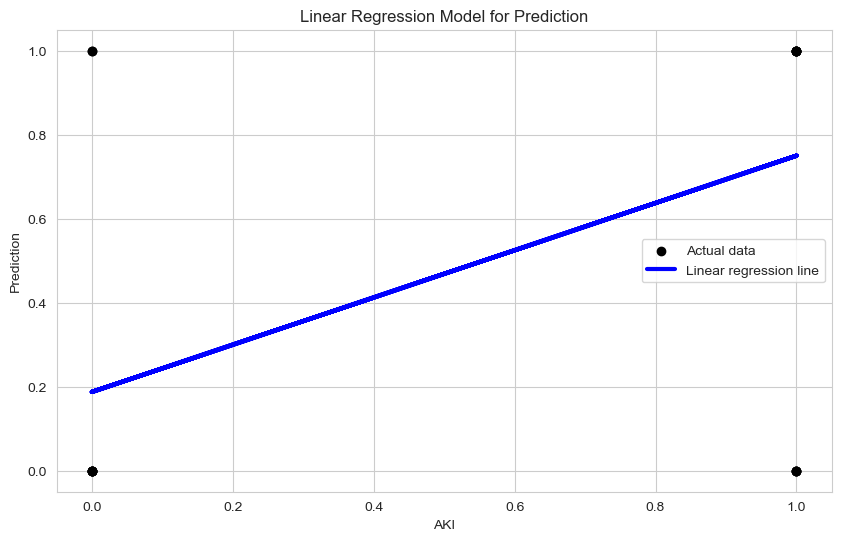

In [12]:
plt.figure(figsize=(10, 6))

# Actual data points
plt.scatter(X_test, y_test, color='black', label='Actual data')

# Predicted line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression line')

plt.title('Linear Regression Model for Prediction')
plt.xlabel('AKI')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [14]:
kid_annot

,Person ID,Side,AKI,Transcript,Prediction
Sample ID,,,,,
1,D001,L,0,7.819896,0
2,D002,L,1,8.614007,1
3,D002,P,1,8.508942,1
4,D003,L,0,7.865299,0
5,D003,P,0,7.814111,0
...,...,...,...,...,...
90,D111,P,1,8.781343,1
91,D118,L,1,8.166975,1
92,D118,P,1,8.362494,1


In [32]:
#AUROC
y_true = kid_annot['AKI'].tolist()
y_scores = kid_annot['Prediction'].tolist()
roc_auc = roc_auc_score(y_true, y_scores)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr, tpr
# Plotting
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
#plt.show()

(array([0. , 0.2, 1. ]), array([0.       , 0.7173913, 1.       ]))

In [15]:
patient_ids = kid_annot['Person ID'].unique()

train_patient_ids, test_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)

train_df = kid_annot[kid_annot['Person ID'].isin(train_patient_ids)]
test_df = kid_annot[kid_annot['Person ID'].isin(test_patient_ids)]

In [17]:
#Applying logistic Regression
clf = LogisticRegression(random_state=0).fit(sorted_kidney.iloc[[0,1,2],:-1].transpose(),kid_annot['AKI'])
pred = clf.predict(sorted_kidney.iloc[[0,1,2],:-1].transpose())
preds['Log Reg'] = pred
tn, fp, fn, tp = confusion_matrix(kid_annot['AKI'], pred).ravel()
tn, fp, fn, tp
accuracy(tn, fp, fn, tp)

0.8023255813953488

In [36]:
kid_annot

,Person ID,Side,AKI,Transcript1
Sample ID,,,,
1,D001,L,0,7.819896
2,D002,L,1,8.614007
3,D002,P,1,8.508942
4,D003,L,0,7.865299
5,D003,P,0,7.814111
...,...,...,...,...
90,D111,P,1,8.781343
91,D118,L,1,8.166975
92,D118,P,1,8.362494


In [18]:
preds

{'Model 1': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0],
 'Log Reg': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       dtype=int64)}

In [19]:
kid_annot = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney_annot.csv')
kid_annot = kid_annot.rename(columns={'pData.eset..match.unique.sample_ID...sample_ID....': 'Sample ID', 'person' : 'Person ID',  'side' : 'Side'})
kid_annot = kid_annot.drop(columns=['Unnamed: 0'])
kid_annot.set_index('Sample ID', inplace=True)

#Splitting the initial data into train and test data
kidney_df = kidney_df = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney.csv')
kidney_df = kidney_df.drop(columns=['Unnamed: 0'])
kidney_df.head()
train_kidney, test_kidney = train_test_split(kidney_df, test_size=0.2, random_state=42)
train_kidney.head()
#sorted_train = train_kidney.sort_values(by=['Pvalues'], ascending=True)
pvalues = []
for i in range(len(train_kidney)):
    row = (train_kidney.iloc[i].tolist())
    kid_annot["Transcript"] = row
    transcript_pos = kid_annot.loc[kid_annot.AKI == 1]["Transcript"]
    transcript_neg = kid_annot.loc[kid_annot.AKI == 0]["Transcript"]
    p = ttest_ind(transcript_pos, transcript_neg, equal_var=False).pvalue
    pvalues.append(p)
    
train_kidney["Pvalues"] = pvalues





In [20]:
sorted_train = train_kidney.sort_values(by='Pvalues', ascending=True)
transcript_1 = sorted_train.iloc[0].tolist() #For train data the same transcript as in previous case? 

In [21]:
#ttest for test data
pvalues = []
for i in range(len(test_kidney)):
    row = (test_kidney.iloc[i].tolist())
    kid_annot["Transcript"] = row
    transcript_pos = kid_annot.loc[kid_annot.AKI == 1]["Transcript"]
    transcript_neg = kid_annot.loc[kid_annot.AKI == 0]["Transcript"]
    p = ttest_ind(transcript_pos, transcript_neg, equal_var=False).pvalue
    pvalues.append(p)
    
test_kidney["Pvalues"] = pvalues
sorted_test = test_kidney.sort_values(by='Pvalues', ascending=True)
transcript = sorted_test.iloc[0].tolist()
kid_annot['Transcript'] = transcript[:-1]

In [22]:
mean_positive = np.mean(kid_annot.loc[kid_annot.AKI == 1]["Transcript"])
mean_negative = np.mean(kid_annot.loc[kid_annot.AKI == 0]["Transcript"])
threshold = (mean_positive+mean_negative) / 2
threshold

8.013015601243909

In [25]:
labels = []
for x in kid_annot['Transcript']:
    if x >= threshold:
        labels.append(1)
    else: labels.append(0)
kid_annot["Prediction"] = labels

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(kid_annot['AKI'], kid_annot['Prediction']).ravel()
#tn, fp, fn, tp
#labels
preds['Test Data'] = labels

In [26]:
preds

{'Model 1': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0],
 'Log Reg': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       dtype=int64),
 'Test Data': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [20]:
accuracy(tn, fp, fn, tp)

0.7209302325581395

In [29]:
y_true = kid_annot['AKI'].tolist()
y_scores = kid_annot['Prediction'].tolist()
roc_auc = roc_auc_score(y_true, y_scores)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
x = roc_curve(y_true, y_scores)[0]
x

array([0.   , 0.225, 1.   ])

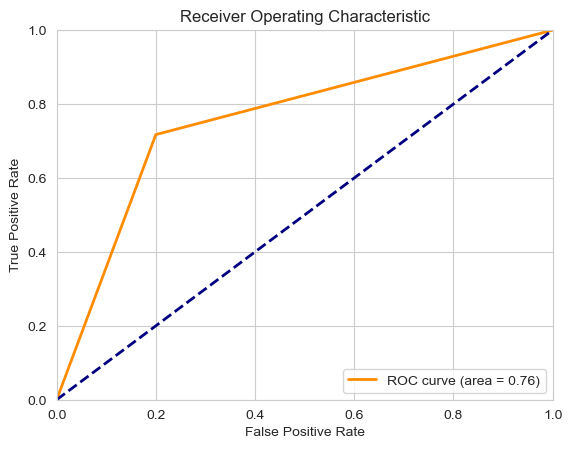

In [23]:
# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
kid_annot.head() #as we can see the method does not work great on test data, which is quite smaller, accuracy fell as well

,Person ID,Side,AKI,Transcript,Prediction
Sample ID,,,,,
1,D001,L,0,8.021189,1
2,D002,L,1,8.887320,1
3,D002,P,1,8.948000,1
4,D003,L,0,8.248810,1
5,D003,P,0,8.157632,1


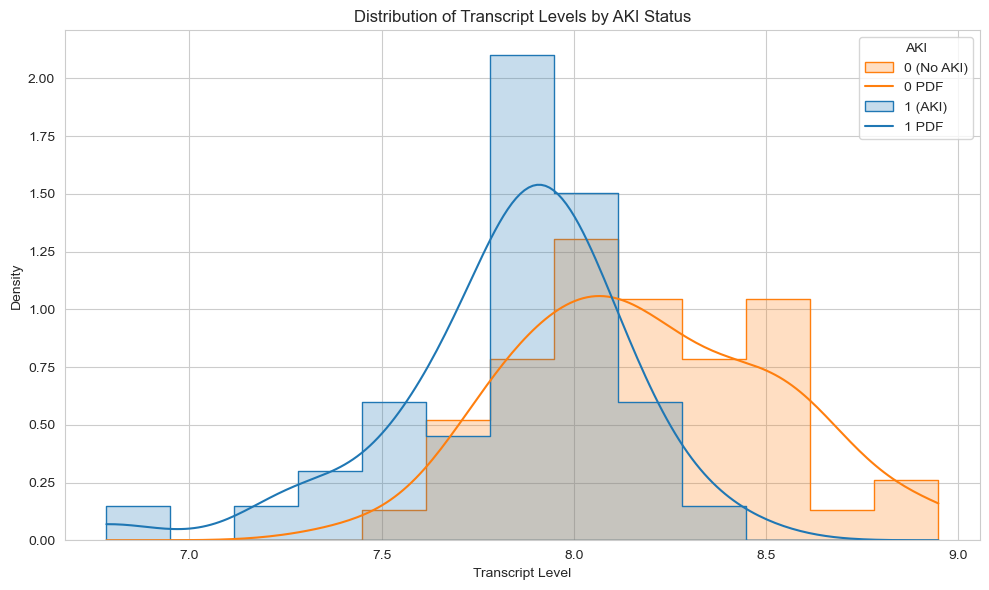

In [23]:
#Test Data
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=kid_annot, x="Transcript", hue="AKI", element="step", stat="density", common_norm=False, kde=True)

plt.title('Distribution of Transcript Levels by AKI Status')
plt.xlabel('Transcript Level')
plt.ylabel('Density')
plt.legend(title='AKI', labels=['0 (No AKI)', '0 PDF', '1 (AKI)', '1 PDF'])

plt.tight_layout()
plt.show()

In [70]:
kid_annot = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney_annot.csv')
kid_annot = kid_annot.rename(columns={'pData.eset..match.unique.sample_ID...sample_ID....': 'Sample ID', 'person' : 'Person ID',  'side' : 'Side'})
kid_annot = kid_annot.drop(columns=['Unnamed: 0'])
kid_annot.set_index('Sample ID', inplace=True)
kidney_df = kidney_df = pd.read_csv(r'C:\Users\hp\Desktop\thesis\Darcovska_ledvina\kidney.csv')
kidney_df = kidney_df.drop(columns=['Unnamed: 0'])


y = kid_annot['AKI'].tolist() #target

length = kidney_df.shape[1]

samples = list() 
for i in range(length):
    col = kidney_df.iloc[:, i].tolist()
    samples.append(col)


float

In [75]:
#K-Fold Cross-Validation
samples = np.array(samples)
y = np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for train_index, test_index in kf.split(samples):
    samples_train, samples_test = samples[train_index], samples[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(samples_train, y_train)
    
    y_pred = model.predict(samples_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

average_score = np.mean(scores)
print(f'Average score: {average_score:.4f}')

Average score: 0.6980


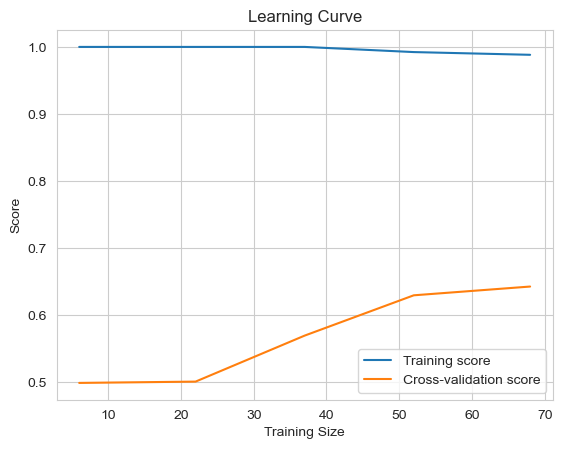

In [82]:
#Imlementing Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, samples, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()